In [1]:
import pandas as pd
df_train=pd.read_csv('G://python_lesson//L24//L24//purchase//train.csv')

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306871 entries, 0 to 2306870
Data columns (total 29 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_detail_id         int64  
 1   order_id                int64  
 2   order_total_num         float64
 3   order_amount            float64
 4   order_total_payment     float64
 5   order_total_discount    float64
 6   order_pay_time          object 
 7   order_status            int64  
 8   order_count             float64
 9   is_customer_rate        float64
 10  order_detail_status     float64
 11  order_detail_goods_num  float64
 12  order_detail_amount     float64
 13  order_detail_payment    float64
 14  order_detail_discount   float64
 15  customer_province       object 
 16  customer_city           object 
 17  member_id               float64
 18  customer_id             int64  
 19  customer_gender         float64
 20  member_status           float64
 21  is_member_actived       float64

In [3]:
df_train.isnull().sum()

order_detail_id                 0
order_id                        0
order_total_num                 0
order_amount                    0
order_total_payment             0
order_total_discount            0
order_pay_time                  0
order_status                    0
order_count                     0
is_customer_rate                0
order_detail_status             0
order_detail_goods_num          0
order_detail_amount             0
order_detail_payment            0
order_detail_discount           0
customer_province            1139
customer_city                1150
member_id                       0
customer_id                     0
customer_gender           1671081
member_status             1671081
is_member_actived         1671081
goods_id                        0
goods_class_id                  0
goods_price                   436
goods_status                    0
goods_has_discount              0
goods_list_time                 0
goods_delist_time               0
dtype: int64

In [4]:
df_train['customer_province'].value_counts()#province可以用广东省和江苏省填充

广东省         255700
江苏省         206593
浙江省         188219
河南省         131419
山东省         128916
上海          117625
湖北省         113378
湖南省         106706
安徽省         102575
江西省         102274
四川省          82279
福建省          81888
河北省          79617
北京           71394
辽宁省          59402
广西壮族自治区      54188
山西省          51759
陕西省          45786
天津           42147
黑龙江省         40328
云南省          40250
重庆           37459
贵州省          33775
内蒙古自治区       27119
吉林省          26839
新疆维吾尔自治区     23043
甘肃省          22440
海南省          15540
宁夏回族自治区       8134
青海省           5874
西藏自治区         3055
台湾              10
香港特别行政区          1
Name: customer_province, dtype: int64

In [5]:
df_train['customer_city'].value_counts()#用上海填充

上海市      117625
北京市       71394
广州市       59772
杭州市       53752
武汉市       47894
          ...  
九龙            1
新北市           1
台中市           1
可克达拉市         1
宜兰县           1
Name: customer_city, Length: 375, dtype: int64

In [6]:
df_train['customer_gender'].value_counts()

0.0    603970
2.0     18468
1.0     13352
Name: customer_gender, dtype: int64

In [7]:
df_train['member_status'].value_counts()#该字段无用

1.0    635790
Name: member_status, dtype: int64

In [8]:
df_train['is_member_actived'].value_counts()#该字段无用,说明全部都是会员且状态正常

1.0    635790
Name: is_member_actived, dtype: int64

In [9]:
print(df_train['order_pay_time'].min())
print(df_train['order_pay_time'].max())

2012-11-01 00:00:07
2013-08-31 23:59:59


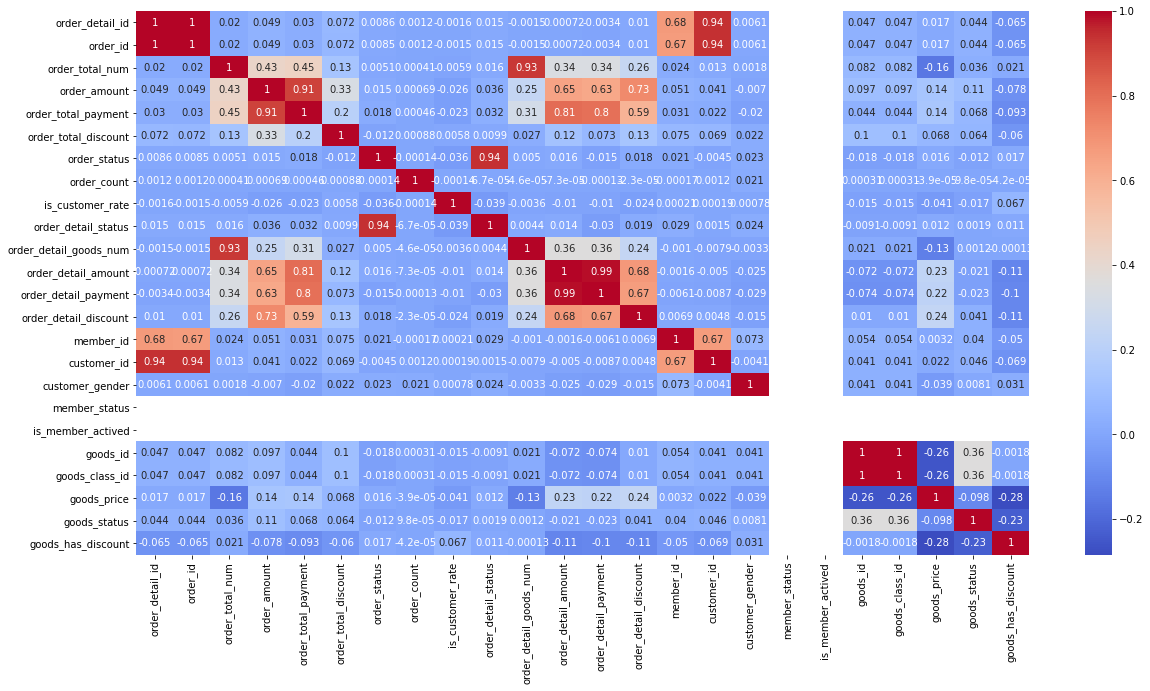

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

In [11]:

df_train['goods_status'].value_counts()

1.0    1929848
2.0     294295
0.0      82728
Name: goods_status, dtype: int64

In [12]:
#order_id，order_detail_id，customner_id相互替代
#order_detail_goods_num,order_total_num
#order_detail_status,order_status
#order_total_payment,order_detail_payment
#member_status,is_member_actived无用
stay_cols=['customer_id','order_id','order_total_num','order_amount','order_total_payment','order_total_discount','order_pay_time','order_status','order_count','is_customer_rate','order_detail_goods_num','order_detail_amount','order_detail_discount','customer_province','customer_city','customer_gender','goods_id','goods_class_id','goods_price','goods_status','goods_has_discount','goods_list_time','goods_delist_time']

In [13]:
df_train.columns

Index(['order_detail_id', 'order_id', 'order_total_num', 'order_amount',
       'order_total_payment', 'order_total_discount', 'order_pay_time',
       'order_status', 'order_count', 'is_customer_rate',
       'order_detail_status', 'order_detail_goods_num', 'order_detail_amount',
       'order_detail_payment', 'order_detail_discount', 'customer_province',
       'customer_city', 'member_id', 'customer_id', 'customer_gender',
       'member_status', 'is_member_actived', 'goods_id', 'goods_class_id',
       'goods_price', 'goods_status', 'goods_has_discount', 'goods_list_time',
       'goods_delist_time'],
      dtype='object')

In [14]:
df_stay_cols=df_train[stay_cols]

In [15]:
df_stay_cols['customer_id'].nunique()

1585986

In [16]:
df_stay_cols['goods_has_discount'].value_counts()

0.0    2108166
1.0     198705
Name: goods_has_discount, dtype: int64

<ipython-input-17-03284efa7527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['order_pay_time']=pd.to_datetime(df_stay_cols['order_pay_time'])


In [18]:
df_stay_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306871 entries, 0 to 2306870
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   customer_id             int64         
 1   order_id                int64         
 2   order_total_num         float64       
 3   order_amount            float64       
 4   order_total_payment     float64       
 5   order_total_discount    float64       
 6   order_pay_time          datetime64[ns]
 7   order_status            int64         
 8   order_count             float64       
 9   is_customer_rate        float64       
 10  order_detail_goods_num  float64       
 11  order_detail_amount     float64       
 12  order_detail_discount   float64       
 13  customer_province       object        
 14  customer_city           object        
 15  customer_gender         float64       
 16  goods_id                int64         
 17  goods_class_id          int64         
 18  go

<ipython-input-19-c4b745a74e00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['order_pay_time_m']=df_stay_cols['order_pay_time'].dt.month
<ipython-input-19-c4b745a74e00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['order_pay_time_d']=df_stay_cols['order_pay_time'].dt.day
<ipython-input-19-c4b745a74e00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [20]:
df_stay_cols[['order_pay_time','order_pay_time_m']]


,order_pay_time,order_pay_time_m
0,2012-11-01 00:10:56,11
1,2013-08-31 23:14:42,8
2,2013-08-31 23:14:42,8
3,2013-08-31 22:06:35,8
4,2013-08-31 21:33:36,8
...,...,...
2306866,2013-01-10 19:24:31,1
2306867,2013-01-27 15:00:27,1
2306868,2013-01-27 15:00:27,1
2306869,2012-11-11 00:10:37,11


In [21]:
df_stay_cols['order_pay_time'].min()#最小值2012-11-01 00:00:07
df_stay_cols['order_pay_time'].max()#max 2013-08-31 23:59:59

Timestamp('2013-08-31 23:59:59')

In [22]:
import datetime
df_stay_cols[['goods_list_time','order_pay_time','goods_delist_time']].min()#goods_delist_time的最小值为异常值，替换为2012-10-11 10:00:00
df_stay_cols['goods_delist_time']=pd.to_datetime(df_stay_cols['goods_delist_time'])
df_stay_cols.goods_delist_time[df_stay_cols['goods_delist_time']<datetime.datetime(2012,10,11,10,0,0)]=datetime.datetime(2012,10,11,10,0,0)

<ipython-input-22-c78ee5e619a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['goods_delist_time']=pd.to_datetime(df_stay_cols['goods_delist_time'])
<ipython-input-22-c78ee5e619a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols.goods_delist_time[df_stay_cols['goods_delist_time']<datetime.datetime(2012,10,11,10,0,0)]=datetime.datetime(2012,10,11,10,0,0)
E:\jupyter\anaconda\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

In [23]:
df_stay_cols['order_status'].value_counts()

6      2089352
101      98145
3        79823
1        34618
4         4932
0            1
Name: order_status, dtype: int64

In [24]:
print(df_stay_cols.groupby('customer_id')['customer_gender'].last().isnull().sum())

1233167


In [25]:
df_stay_cols.isnull().sum()

customer_id                     0
order_id                        0
order_total_num                 0
order_amount                    0
order_total_payment             0
order_total_discount            0
order_pay_time                  0
order_status                    0
order_count                     0
is_customer_rate                0
order_detail_goods_num          0
order_detail_amount             0
order_detail_discount           0
customer_province            1139
customer_city                1150
customer_gender           1671081
goods_id                        0
goods_class_id                  0
goods_price                   436
goods_status                    0
goods_has_discount              0
goods_list_time                 0
goods_delist_time               0
order_pay_time_m                0
order_pay_time_d                0
order_pay_time_wd               0
dtype: int64

In [26]:
#
df_stay_cols['goods_price'].min()

-79.97478829464501

In [27]:
df_stay_cols['customer_gender']=df_stay_cols['customer_gender'].fillna(0)

<ipython-input-27-43ab193f8ea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['customer_gender']=df_stay_cols['customer_gender'].fillna(0)


In [28]:
#将价格的负数和空填充为最小正数
min_price=df_stay_cols[df_stay_cols['goods_price']>=0]['goods_price'].min()
df_stay_cols['goods_price']=df_stay_cols['goods_price'].fillna(min_price)
df_stay_cols.goods_price[df_stay_cols['goods_price']<0]=min_price

<ipython-input-28-d93e49011328>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['goods_price']=df_stay_cols['goods_price'].fillna(min_price)
<ipython-input-28-d93e49011328>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols.goods_price[df_stay_cols['goods_price']<0]=min_price


In [29]:
df_stay_cols['customer_province']=df_stay_cols['customer_province'].fillna('广东省')
df_stay_cols['customer_city']=df_stay_cols['customer_city'].fillna('上海市')

<ipython-input-29-182593c502dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['customer_province']=df_stay_cols['customer_province'].fillna('广东省')
<ipython-input-29-182593c502dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['customer_city']=df_stay_cols['customer_city'].fillna('上海市')


In [30]:
t_str='2012-10-11 10:00:00'
t=datetime.datetime.strptime(t_str, '%Y-%m-%d %H:%M:%S')
df_stay_cols['goods_list_time_diff']=df_stay_cols['goods_list_time'].map(lambda x:(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')-t).days/364)
df_stay_cols['goods_delist_time_diff']=df_stay_cols['goods_delist_time'].map(lambda x:(datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')-t).days/364)

<ipython-input-30-aa85494dbd20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['goods_list_time_diff']=df_stay_cols['goods_list_time'].map(lambda x:(datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')-t).days/364)
<ipython-input-30-aa85494dbd20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['goods_delist_time_diff']=df_stay_cols['goods_delist_time'].map(lambda x:(datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')-t).days/364)


In [31]:
df_stay_cols['goods_class_id'] = pd.factorize(df_stay_cols['goods_class_id'])[0]

<ipython-input-31-c568afbf1c92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['goods_class_id'] = pd.factorize(df_stay_cols['goods_class_id'])[0]


In [32]:
df_stay_cols['customer_city'].value_counts()
df_stay_cols['customer_city'] = pd.factorize(df_stay_cols['customer_city'])[0]

<ipython-input-32-13dd030927fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stay_cols['customer_city'] = pd.factorize(df_stay_cols['customer_city'])[0]


In [33]:
df_stay_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306871 entries, 0 to 2306870
Data columns (total 28 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   customer_id             int64         
 1   order_id                int64         
 2   order_total_num         float64       
 3   order_amount            float64       
 4   order_total_payment     float64       
 5   order_total_discount    float64       
 6   order_pay_time          datetime64[ns]
 7   order_status            int64         
 8   order_count             float64       
 9   is_customer_rate        float64       
 10  order_detail_goods_num  float64       
 11  order_detail_amount     float64       
 12  order_detail_discount   float64       
 13  customer_province       object        
 14  customer_city           int64         
 15  customer_gender         float64       
 16  goods_id                int64         
 17  goods_class_id          int64         
 18  go

In [60]:
#final_data = pd.DataFrame(df_stay_cols.groupby('customer_id')['customer_gender'].last())
import time
import numpy as np
from tqdm import tqdm
# 对数据进行预处理
def prerpocess(raw, train='train'):
    st = time.time()

    data = pd.DataFrame(raw.groupby('customer_id')['customer_gender'].last())
    # 添加商品相关信息
    data[['goods_class_id_last', 'goods_status_last', 'goods_price_last', 'goods_has_discount_last', 'goods_list_time_last', 'goods_delist_time_last']] = raw.groupby('customer_id')['goods_class_id', 'goods_status', 'goods_price', 'goods_has_discount', 'goods_list_time', 'goods_delist_time'].last()
    # 添加订单相关信息
    data[['order_total_num_last', 'order_amount_last',
       'order_total_payment_last', 'order_total_discount_last', 'order_pay_time_last',
       'order_status_last', 'order_count_last', 'is_customer_rate_last',
        'order_detail_goods_num_last', 'order_detail_amount_last',
        'order_detail_discount_last']] = raw.groupby('customer_id')['order_total_num', 'order_amount',
       'order_total_payment', 'order_total_discount', 'order_pay_time',
       'order_status', 'order_count', 'is_customer_rate',
        'order_detail_goods_num', 'order_detail_amount',
        'order_detail_discount'].last()
    print(type(data['order_pay_time_last']))
    # 添加商品原始价格统计字段
    data[['good_price_std', 'good_price_mean', 'good_price_min', 'good_price_max']] = raw.groupby('customer_id')['goods_price'].agg([('good_price_std','std'), ('good_price_mean','mean'), ('good_price_min','min'), ('good_price_max','max')])
    # 添加订单实付金额统计字段
    data[['order_total_payment_std', 'order_total_payment_mean', 'order_total_payment_min', 'order_total_payment_max']] = raw.groupby('customer_id')['order_total_payment'].agg([('order_total_payment_std','std'), ('order_total_payment_mean','mean'),( 'order_total_payment_min','min'), ('order_total_payment_max','max')])
    # 用户购买的订单数量
    data['count'] = raw.groupby('customer_id')['order_id'].nunique()
    # 用户购买的商品数量
    data['goods_count'] = raw.groupby('customer_id')['order_total_num'].sum()
    # 用户所在省份
    #data['customer_province'] = raw.groupby('customer_id')['customer_province'].last()
    # 用户所在城市
    data['customer_city'] = raw.groupby('customer_id')['customer_city'].last()
    # 用户是否评价 统计结果（平均，综合）
    data[['is_customer_rate_ratio','is_customer_rate_sum']] = raw.groupby('customer_id')['is_customer_rate'].agg([('is_customer_rate_ratio',np.mean),('is_customer_rate_sum',np.sum)])
    # 用户购买的goods数量，一个订单商品，即order_detail_id（goods_id）
    data['order_detail_count'] = raw.groupby('customer_id')['customer_id'].count()
    # 商品折扣统计属性（sum, ave）
    data[['goods_has_discount_sum','goods_has_discount_ave']] = raw.groupby('customer_id')['goods_has_discount'].agg([('goods_has_discount_sum',np.sum),('goods_has_discount_ave',np.mean)])
    # 订单实付金额 统计属性（sum, ave）
    data[['order_total_payment_sum','order_total_ave_pay']] = raw.groupby('customer_id')['order_total_payment'].agg([('order_total_payment_sum',np.sum),('order_total_ave_pay',np.mean)])
    # 订单商品数量 统计属性（sum, ave）
    data[['order_total_num_sum', 'order_total_num_ave']] = raw.groupby('customer_id')['order_total_num'].agg([('order_total_num_sum',np.sum),('order_total_num_ave',np.mean)])

    # 时间转换
    def time2multi(x):
        t=datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
        return pd.Series([t.month,t.day,t.weekday(),t.hour,t.minute,t.second])
    # 订单付款时间
    #data[['order_pay_time_last_m','order_pay_time_last_d','order_pay_time_last_week','order_pay_time_last_h','order_pay_time_last_min','order_pay_time_last_s']]=data['order_pay_time_last'].apply(lambda x: x.strftime(‘%Y-%m-%d’)).apply(time2multi)
    #data[['order_pay_time_last_m','order_pay_time_last_d','order_pay_time_last_week','order_pay_time_last_h','order_pay_time_last_min','order_pay_time_last_s']] = raw.groupby('customer_id')['order_pay_time_last_m','order_pay_time_last_d','order_pay_time_last_week','order_pay_time_last_h','order_pay_time_last_min','order_pay_time_last_s'].last()
    data['order_pay_time']=pd.to_datetime(data['order_pay_time_last'])
    data['order_pay_time_m']=data['order_pay_time_last'].dt.month
    data['order_pay_time_d']=data['order_pay_time_last'].dt.day
    data['order_pay_time_wd']=data['order_pay_time_last'].dt.weekday
    t_str='2012-10-11 10:00:00'
    t=datetime.datetime.strptime(str(t_str), '%Y-%m-%d %H:%M:%S')
    # 商品最新上架时间diff （距离起始时间）
    data['goods_list_time_diff'] = data['goods_list_time_last'].map(lambda x:(datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')-t).days/364)
    # 商品最新下架时间diff （距离起始时间）
    data['goods_delist_time_diff'] = data['goods_delist_time_last'].map(lambda x:(datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')-t).days/364)
    # 商品展示时间
    data['goods_diff'] = data['goods_delist_time_diff'] - data['goods_list_time_diff']
    # 付款时间diff (距离起始时间)
    data['order_pay_time_last_diff'] = data['order_pay_time_last'].map(lambda x:(datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')-t).days/364)
    ed = time.time()
    # 输出preprocess计算时间
    print(ed-st)
    
    return data 

In [61]:
# 8月之前的数据作为训练集
train_raw = df_stay_cols[df_stay_cols['order_pay_time'] < '2013-07-31 23:59:59']
train_raw = prerpocess(train_raw)
# 8月份的数据作为label_raw
label_raw = set(df_stay_cols[df_stay_cols['order_pay_time'] > '2013-07-31 23:59:59']['customer_id'].dropna())
# 如果该用户在8月份完成了购买 label=1, 否则为0
train_raw['labels']=train_raw.index.map(lambda x:int(x in label_raw))
test = prerpocess(df_stay_cols)

<ipython-input-60-be9395d71569>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[['goods_class_id_last', 'goods_status_last', 'goods_price_last', 'goods_has_discount_last', 'goods_list_time_last', 'goods_delist_time_last']] = raw.groupby('customer_id')['goods_class_id', 'goods_status', 'goods_price', 'goods_has_discount', 'goods_list_time', 'goods_delist_time'].last()
<ipython-input-60-be9395d71569>:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  'order_detail_discount_last']] = raw.groupby('customer_id')['order_total_num', 'order_amount',


<class 'pandas.core.series.Series'>
86.39625978469849
<class 'pandas.core.series.Series'>
97.20134854316711


In [70]:
# 这些时间，之前已经根据时间提取了特征 原始的格式没法直接参与训练
train_data = train_raw.drop(['goods_list_time_last', 'goods_delist_time_last', 'order_pay_time_last'], axis=1)
# 暂时没有处理customer_province, customer_city 可以先去掉
train_data = train_data.drop(['order_pay_time'], axis=1)
# 分类变量
catel = ['order_pay_time_m', 'order_pay_time_d', 'order_pay_time_wd', 'order_status_last', 'goods_status_last', 'goods_class_id_last', 'customer_gender']

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435404 entries, 1000000 to 2826574
Data columns (total 43 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   customer_gender              1435404 non-null  float64
 1   goods_class_id_last          1435404 non-null  int64  
 2   goods_status_last            1435404 non-null  float64
 3   goods_price_last             1435404 non-null  float64
 4   goods_has_discount_last      1435404 non-null  float64
 5   order_total_num_last         1435404 non-null  float64
 6   order_amount_last            1435404 non-null  float64
 7   order_total_payment_last     1435404 non-null  float64
 8   order_total_discount_last    1435404 non-null  float64
 9   order_status_last            1435404 non-null  int64  
 10  order_count_last             1435404 non-null  float64
 11  is_customer_rate_last        1435404 non-null  float64
 12  order_detail_goods_num_last  1435404

In [ ]:
import lightgbm
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_data.drop('labels', axis=1), np.array(train_data['labels']), test_size=0.2, random_state=33)
from sklearn.model_selection import KFold
# 采用CV=5折交叉验证
kf = KFold(n_splits=5,shuffle=True)

y_pre = 0
for train_index , test_index in kf.split(train_data):
    # 设置每一折的train和test
    X_train, X_valid, y_train, y_valid = train_data.drop('labels', axis=1).iloc[train_index], train_data.drop('labels', axis=1).iloc[test_index], np.array(train_data['labels'])[train_index], np.array(train_data['labels'])[test_index]
    import lightgbm as lgb
    param = {
    'num_leaves':121,
    'boosting_type': 'gbdt',
    'objective':'binary',
    'max_depth':7,
    'learning_rate':0.05,
    'metric':'binary_logloss'}
    # 使用lgb进行训练
    trn_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_valid, label=y_valid)
    lgbm = lgb.train(param,trn_data,valid_sets=[trn_data,val_data],num_boost_round = 10000, early_stopping_rounds=150,verbose_eval=50, categorical_feature=catel)
    # 得到test的预测结果
    test = test[X_train.columns]
    y_pre += lgbm.predict(test)

E:\jupyter\anaconda\lib\site-packages\lightgbm\basic.py:1554: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['customer_gender', 'goods_class_id_last', 'goods_status_last', 'order_pay_time_d', 'order_pay_time_m', 'order_pay_time_wd', 'order_status_last']
  warnings.warn('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Info] Number of positive: 18140, number of negative: 1130183
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.293387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6172
[LightGBM] [Info] Number of data points in the train set: 1148323, number of used features: 42


E:\jupyter\anaconda\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
E:\jupyter\anaconda\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015797 -> initscore=-4.132015
[LightGBM] [Info] Start training from score -4.132015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 150 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [ ]:
# 削弱0附近的影响，因为结果有log，一旦分错，接近0的部分log0影响非常大
def f(x):
    if x < 0.1:
        return 0.1
    if x > 0.9:
        return 0.9
    return x

In [ ]:
test['result'] = y_pre
test['result'] = test['result'].map(f)
subm = pd.DataFrame(test['result'])
subm.to_csv('submission_new.csv')
# 平均购买情况
subm.mean()